In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('sales.xlsx')
df = df[df['Type'] != 'Check Qty']
df = df[df['Type'] != 'Average per Check']
df = df.drop(columns=['Type'])
df = df.drop(columns=['07:00'])
df = df.drop(columns=['08:00'])
df = df.drop(columns=['09:00'])
df = df.drop(columns=['10:00'])
df = df.drop(columns=['11:00'])
df = df.drop(columns=['12:00'])
df = df.drop(columns=['13:00'])
df = df.drop(columns=['14:00'])
df = df.drop(columns=['15:00'])

In [10]:
print(df)

            Date        Day    Total
0     01/01/2022   Saturday  7623.75
3     01/02/2022     Sunday  6369.50
6     01/03/2022     Monday  5228.40
9     01/04/2022    Tuesday  3281.50
12    01/05/2022  Wednesday   758.50
...          ...        ...      ...
3261  12/28/2024   Saturday  9496.78
3264  12/29/2024     Sunday  8782.00
3267  12/30/2024     Monday  5825.25
3270  12/31/2024    Tuesday  6714.77
3273  01/01/2025  Wednesday  9392.25

[1092 rows x 3 columns]


In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)

df['dayofweek'] = df['Date'].dt.dayofweek 
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

df['total_lag_1'] = df['Total'].shift(1)
df['total_lag_2'] = df['Total'].shift(2)

df.dropna(inplace=True)

print("Prepared DataFrame:")
print(df)

Prepared DataFrame:
           Date        Day    Total  dayofweek  month  day  total_lag_1  \
2    2022-01-03     Monday  5228.40          0      1    3      6369.50   
3    2022-01-04    Tuesday  3281.50          1      1    4      5228.40   
4    2022-01-05  Wednesday   758.50          2      1    5      3281.50   
5    2022-01-06   Thursday   945.95          3      1    6       758.50   
6    2022-01-07     Friday  1516.00          4      1    7       945.95   
...         ...        ...      ...        ...    ...  ...          ...   
1087 2024-12-28   Saturday  9496.78          5     12   28      7384.25   
1088 2024-12-29     Sunday  8782.00          6     12   29      9496.78   
1089 2024-12-30     Monday  5825.25          0     12   30      8782.00   
1090 2024-12-31    Tuesday  6714.77          1     12   31      5825.25   
1091 2025-01-01  Wednesday  9392.25          2      1    1      6714.77   

      total_lag_2  
2         7623.75  
3         6369.50  
4         5228.40  

In [12]:
split_index = int(0.8 * len(df))
X = df[['dayofweek', 'month', 'day', 'total_lag_1', 'total_lag_2']]
y = df['Total']

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 2085035.6022592613


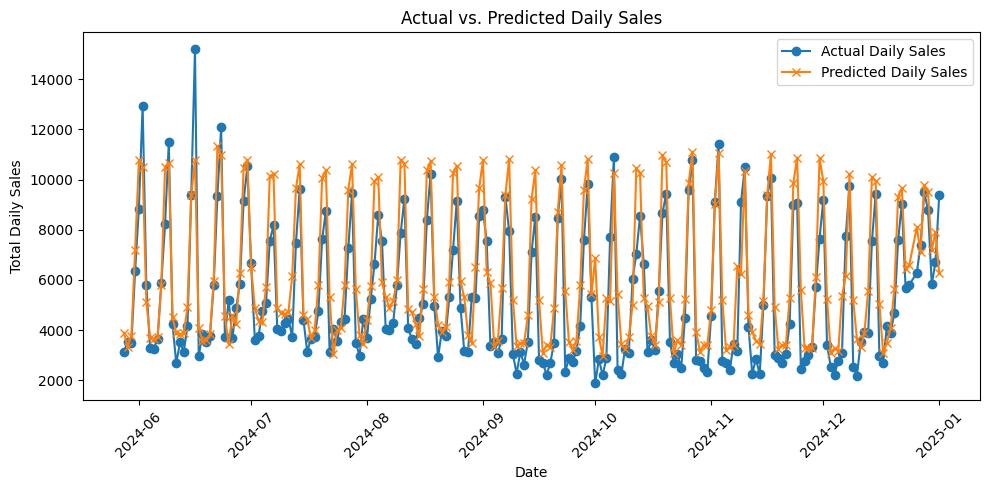

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'].iloc[split_index:], y_test, label='Actual Daily Sales', marker='o')
plt.plot(df['Date'].iloc[split_index:], predictions, label='Predicted Daily Sales', marker='x')
plt.xlabel('Date')
plt.ylabel('Total Daily Sales')
plt.title('Actual vs. Predicted Daily Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
features = pd.DataFrame({

    'dayofweek': [2],
    'month': [2],
    'day': [13],
    'total_lag_1': [1964.46],
    'total_lag_2': [2676.37]
})

predicted_sales = model.predict(features)
print(predicted_sales)

[2868.3054]
